<a href="https://colab.research.google.com/github/Juanafenley/avanzadoIA/blob/main/Trabajo_Pr%C3%A1ctico_Final_Redes_Neuronales_Convolucionales_en_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Practico Final:
### Redes Neuronales Convulcionales en TensorFlow

Juana Fenley, Agustina Gonzalez, Lorenzo Nascimbene y Vicente Brusa.

**Dataset descartados:**

* Dataset animales: https://www.kaggle.com/datasets/philboaz/animal-ori

* Dataset emociones: https://www.kaggle.com/code/crismorales001/detecci-n-de-emociones-prueba/input?select=train

**Dataset final:**
* Dataset animales: https://drive.google.com/drive/folders/1WPld-oB6oK-XgJCvoHmHeoMdymnoP0FU?usp=sharing

**Turorial de Keras:** https://www.youtube.com/watch?v=Uhzn6WoBeXI

**Tutorial de Streamlit:** https://www.youtube.com/watch?v=w6wkvse3D1I


**Explicación del problema y solución propuesta:**

Lo que estamos desarrollando es un modelo de clasificación de imágenes de animales utilizando TensorFlow y Keras. El modelo se entrena con un conjunto de datos que contiene imágenes de diferentes animales. El objetivo principal es que el modelo aprenda a identificar y clasificar correctamente los animales en categorías predefinidas (Elefante, oveja, mariposa, vaca, ardilla). En caso de que la imagen no pertenezca a ninguna de las categorías existentes, el modelo intentará determinar a cuál de ellas se asemeja más.

In [ ]:
pip install keras-visualizer

In [ ]:
# Imporatmos
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import keras
from keras.applications.vgg16 import VGG16
from keras import layers
from tensorflow.keras.applications import VGG16
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import plot_model

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = '/content/drive/MyDrive/DATASET'

In [ ]:
batch_size = 64 #número de ejemplos que se introducen en la red en cada iteración del entrenamiento.
image_sizee = (224, 224) #vamos a redimensionar todas las imágenes del conjunto de datos en un tamaño de 224 x 224 píxeles

In [ ]:
train_directory = '/content/drive/MyDrive/DATASET/train'
test_directory = '/content/drive/MyDrive/DATASET/test'

In [ ]:
train_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
train_generator = tf.keras.utils.image_dataset_from_directory(
    datos + '/train',
    image_size=image_sizee,
    batch_size=batch_size,
)
validation_generator = train_data_generator.flow_from_directory(
    datos + '/train',
    target_size=image_sizee,
    batch_size=batch_size,
    subset='validation'
)

Found 8196 files belonging to 5 classes.
Found 1638 images belonging to 5 classes.


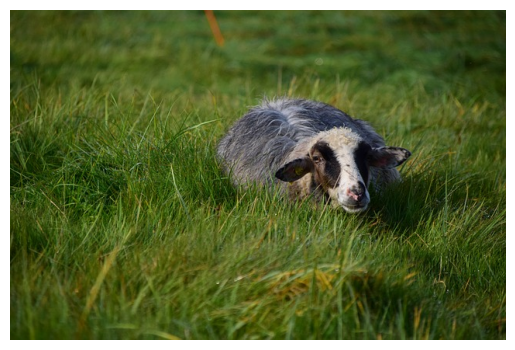

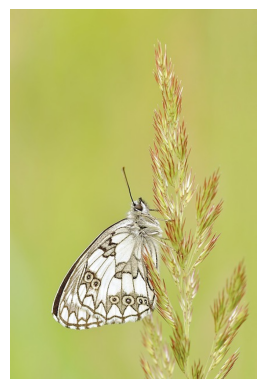

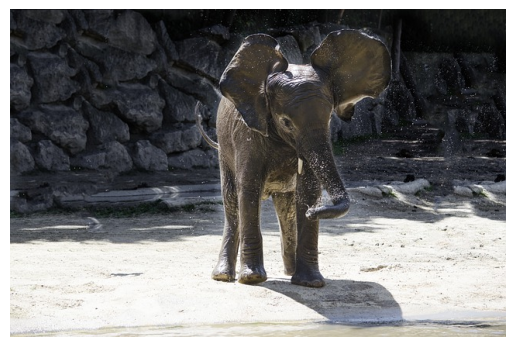

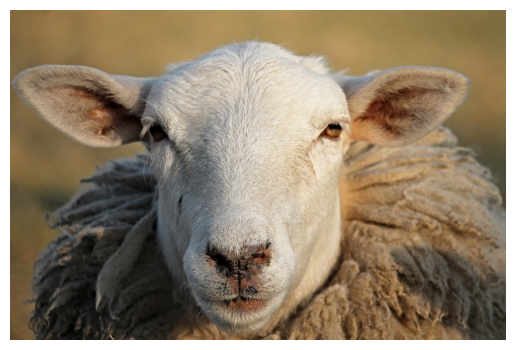

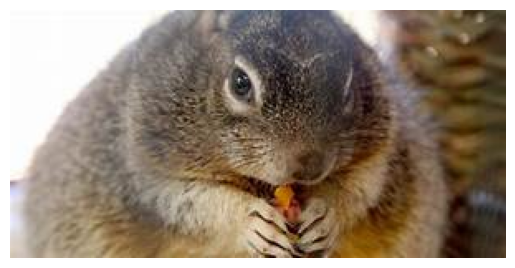

In [ ]:
directorio_imagenes = '/content/drive/MyDrive/DATASET/test'
archivos = os.listdir(directorio_imagenes)

# Seleccionamos al azar algunas imágenes de ejemplo (da la carpeta test) y las mostramos
num_ejemplos = 5
for i in range(num_ejemplos):
    archivo = np.random.choice(archivos)

    # Creamos la ruta al archivo para poder ubicarlo y mostrarlo
    ruta_archivo = os.path.join(directorio_imagenes, archivo)

    # Cargamos las imagenes
    img = Image.open(ruta_archivo)

    # Mostramos las imagenes
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [ ]:
#Modelo que armamos y descartamos por temas de precisión
"""model = keras.Sequential(
    [
        keras.Input(shape=(224, 224, 3)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(4096, activation="relu"),
        layers.Dense(1000, activation="relu"),
        layers.Dense(500, activation="relu"),
        layers.Dense(5, activation="softmax"),
    ]
)

In [ ]:
#Modelo que armamos y descartamos por temas de precisión
"""model = keras.Sequential(
    [
        keras.Input(shape=(224, 224, 3)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(512, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1000, activation="relu"),
        layers.Dense(5, activation="softmax"),
    ]
)

In [ ]:
vgg16 = VGG16(weights='imagenet',
             include_top=False,
             input_shape=(224,224,3))

model = keras.Sequential([
    vgg16,
    layers.Flatten(),
    layers.Dense(4096, activation="relu"),
    layers.Dense(1000, activation="relu"),
    layers.Dense(500, activation="relu"),
    layers.Dense(5, activation="softmax")
])

58889256/58889256 [==============================] - 0s 0us/step


Usamos la arquitectura VGG16 como una capa inicial, ya preentrenada con los pesos entrenados en el conjunto de datos "imagenet". Además, especificamos que las imágenes de entrada deben tener dimensiones de 224x224 píxeles con tres canales de color. Luego agregamos una capa de aplanado (layers.Flatten()) que convierte la salida de la capa VGG16 (que es un tensor tridimensional) en un vector unidimensional. Por último usamos las capas densas para  calcular la distribución de probabilidad de que cada imagen pertenezca a cada una de las clases.



In [ ]:
#Intento nro1 de vizualizar el modelo, pero no lo mostraba:

#from keras_visualizer import visualizer
#visualizer(model, file_format='png', view=True)


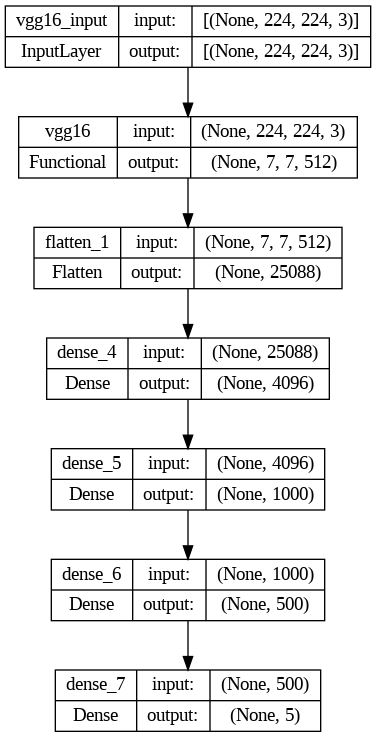

In [ ]:
#Vizualizamos el modelo
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Como podemos ver en gráfico de arriba la entrada del modelo es un tensor de 224 por 224 por 3 y la salida del modelo vgg16 es de 7 por 7 por 512. Esta salida la pasamos por la capa flatten la cual, como explicamos antes, lo que hace es armar una "fila" con los pixeles, o sea agarra nuestro tensor y lo desarma poniendo un pixel "debajo" del otro para formar una fila/vector unidimensional. La salida de esta capa se le pasa a una capa densa que intentará clasificar las imagenes en diferentes clases, la primera las clasifica en 4096. Esto se pasa a la segunda capa densa que dividirá las imagenes en 1000 clases, luego se pasará a la tercera capa densa que tiene 500 clases y por último las imagenes llegan a la última capa densa que clasificará nuestras imagenes en las 5 clases originales o al menos lo intentará.

In [ ]:
#Compilamos el modelo: usamos optimizadores (para reducir el error), cómo vamos a clacular la pérdida y cómo vamos a evaluar el modelo
model.compile(optimizer='adadelta', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [ ]:
#Entrenamos
#model.fit(train_generator)

129/129 [==============================] - 18529s 142s/step - loss: 3.5507 - accuracy: 0.4555


In [ ]:
model.save('/content/drive/MyDrive/DATASET/modelo_animales.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model=keras.models.load_model('/content/drive/MyDrive/DATASET/modelo_animales.h5')

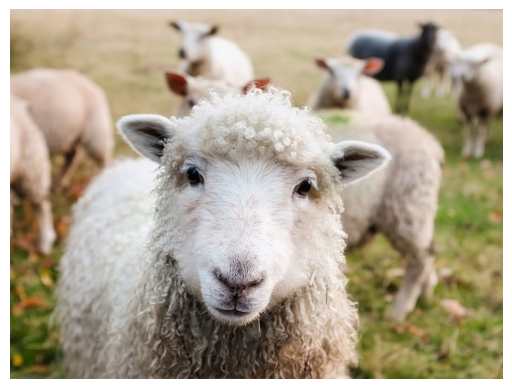

In [ ]:
from PIL import Image
import numpy as np
from keras.applications.vgg16 import preprocess_input

# Ruta de la imagen de prueba elegida
ruta_imagen_prueba = '/content/drive/MyDrive/DATASET/test/e83cb90a28fc093ed1584d05fb1d4e9fe777ead218ac104497f5c978a6e8b0b1_640.jpg'
img = Image.open(ruta_imagen_prueba)

# Muestra la imagen utilizando matplotlib
plt.imshow(img)
plt.axis('off')  # Desactiva los ejes
plt.show()

In [ ]:
# Cargamos la imagen con PIL
img_prueba = Image.open(ruta_imagen_prueba)
img_prueba = img_prueba.resize((224, 224))

# Conviertimos la imagen a un array numpy para poder hacer el model.predict
img_array_prueba = np.array(img_prueba)
img_array_prueba = np.expand_dims(img_array_prueba, axis=0)

# Preprocesamos la imagen
img_array_prueba = preprocess_input(img_array_prueba)

# Predicción:
prediccion = model.predict(img_array_prueba)

1/1 [==============================] - 1s 1s/step


In [ ]:
print(prediccion)

[[2.9211067e-08 3.3091024e-07 4.8578700e-06 9.9999475e-01 7.1015999e-11]]


In [ ]:
ruta_principal = '/content/drive/MyDrive/DATASET/train'
clases = ["Elefante", "Mariposa","Vaca", "Oveja","Ardilla"]

# Muestra las clases
print("Clases disponibles:")
for i, clase in enumerate(clases):
    print(f"{i + 1}: {clase}")

Clases disponibles:
1: Elefante
2: Mariposa
3: Vaca
4: Oveja
5: Ardilla


In [ ]:
clase_predicha = np.argmax(prediccion, axis=1)[0]
nombre_clase_predicha = clases[clase_predicha]
nombre_clase_predicha

'Oveja'

##BONUS

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.1 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
import streamlit as st
from PIL import Image
from google.colab import drive
from skimage.transform import resize

In [ ]:
def model_prediccion(img, model):
  img_resize=resize(img, (224,224))
  x= preprocess_input(img_resize*225)
  x=np.expand_dims(x, axis=0)

  preds=model.predict(x)
  return preds

In [ ]:
def main():
  modelo=load_model('/content/drive/MyDrive/DATASET/modelo_animales.h5')
  st.title("Clasificador de Animales")
  img_file_buffer=st.file_uploader("Cargar una imagen", type=["png", "jpg", "jpeg"])
  if img_file_buffer is not None:
    image=np.array(Image.open(img_file_buffer))
    st.image(image, caption="Imagen", use_column_width=False)
  if st.button("Predicción"):
    predict=model_prediccion(image, modelo)
    st.success("La clase es:".format(clases[np.argmax(predict)]))

In [ ]:
main()

2023-11-24 02:09:43.942 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
